In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
# import xlrd

In [2]:
df = pd.read_csv('heart.xls', sep = '\t')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### **Data Wrangling**

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.rename(columns = {"target":"heart_disease"}, inplace  = True)

In [8]:
def unique_vals(dataframe):
    for i in dataframe.columns:
        if dataframe[i].dtype != 'object':
            print(f"{i}\n{dataframe[i].unique()}\n")

In [9]:
unique_vals(df)

age
[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]

sex
[1 0]

cp
[0 1 2 3]

trestbps
[125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]

chol
[212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]

fbs
[0 1]


In [10]:
boxPlotcols = ['age','trestbps','chol','thalach','oldpeak']

In [11]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
def boxPlots(dataframe):
    for i in boxPlotcols:
        sns.boxplot(dataframe[i]).set_title(f"{i} box plot", fontweight = 'bold')
        plt.show()

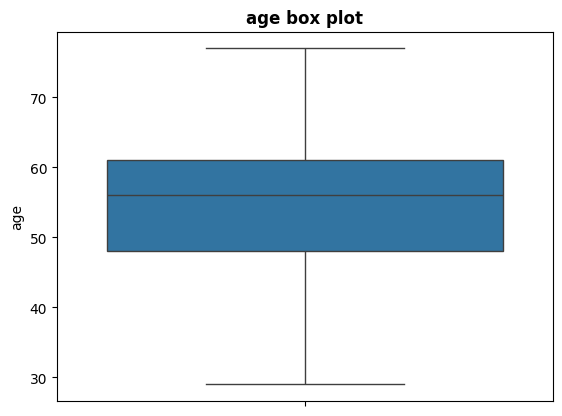

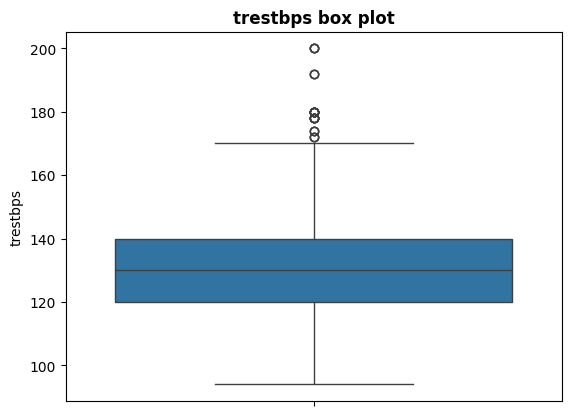

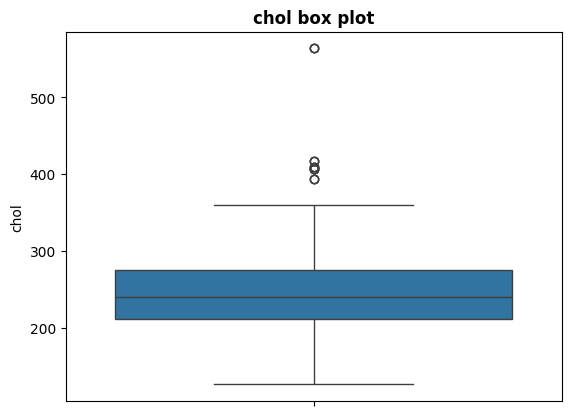

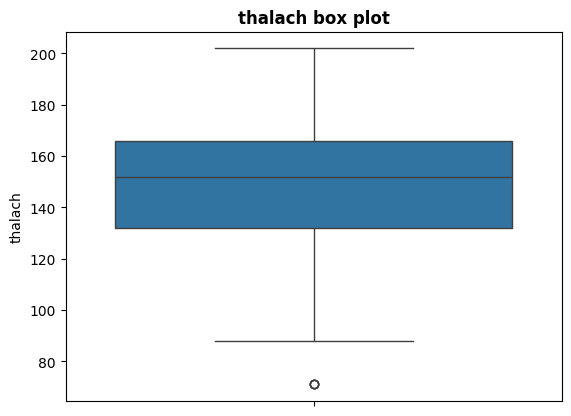

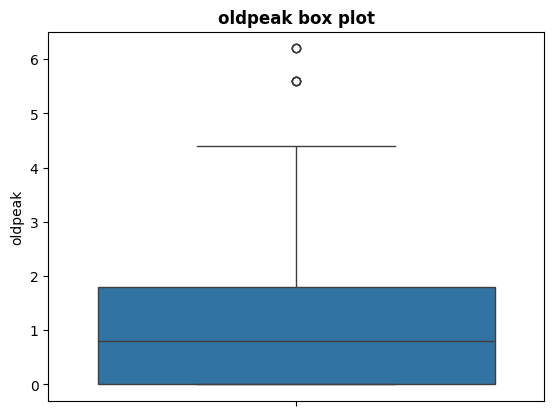

In [14]:
boxPlots(df)

In [15]:
def dataClean(dataframe):
    for i in boxPlotcols:
        if i != 'age':
            q1 = dataframe[i].quantile(0.25)
            q3 = dataframe[i].quantile(0.75)

            iqr = q3 - q1

            lf = q1 - 1.5 * iqr
            uf = q3 + 1.5 * iqr

            dataframe[i] = dataframe[i][(dataframe[i] >= lf) & (dataframe[i] <= uf)] 

In [16]:
dataClean(df)

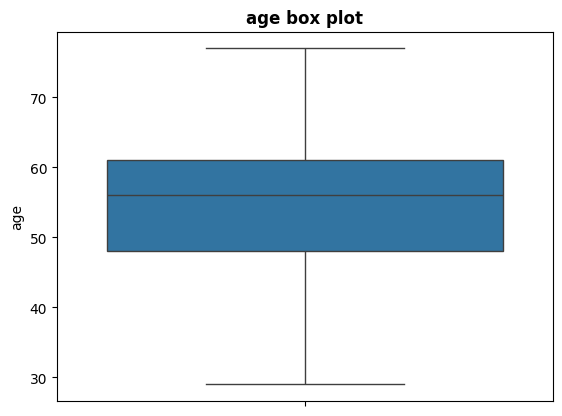

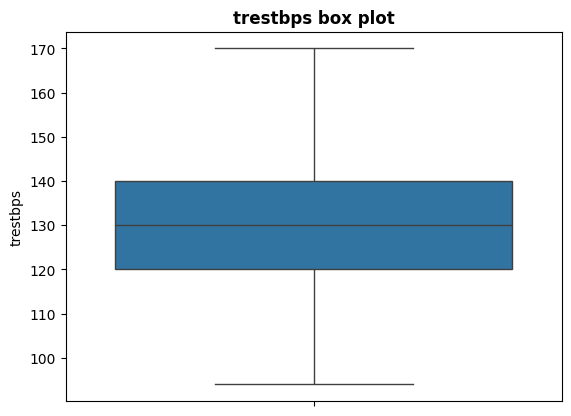

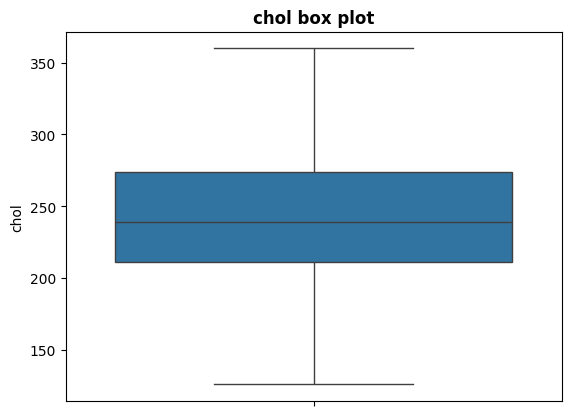

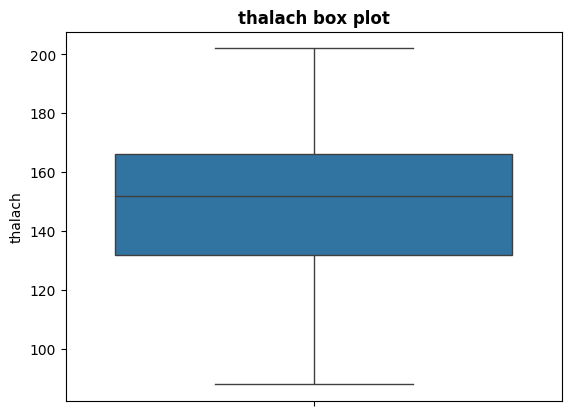

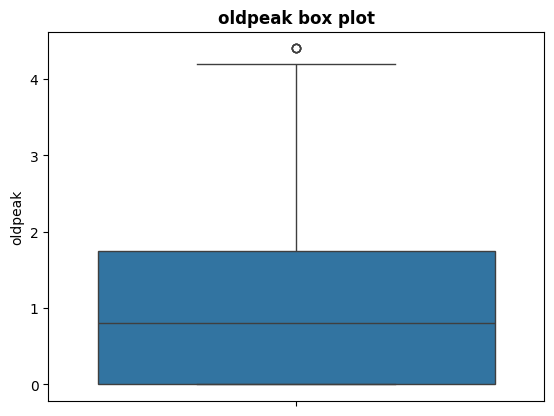

In [17]:
boxPlots(df)

In [18]:
df.shape

(1025, 14)

In [19]:
df.isna().sum()

age               0
sex               0
cp                0
trestbps         30
chol             16
fbs               0
restecg           0
thalach           4
exang             0
oldpeak           7
slope             0
ca                0
thal              0
heart_disease     0
dtype: int64

In [20]:
# if df.trestbps.isna().sum() > 1:
#     print(True)
# else:
#     print(False)

In [21]:
def nullCol(dataframe):
    for i in dataframe.columns:
        if dataframe[i].isna().sum() > 1:
            dataframe[i] = dataframe[i].fillna(method = 'bfill')
        else:
            pass

In [22]:
nullCol(df)

In [23]:
df.isna().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
heart_disease    0
dtype: int64

In [24]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,130.093659,242.583415,0.149268,0.529756,149.427317,0.336585,1.043220,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,15.285467,45.395389,0.356527,0.527878,22.566759,0.472772,1.109773,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,209.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1.000000


In [25]:
df.corr(method='pearson')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
age,1.000000,-0.103240,-0.071966,0.260244,0.176510,0.121243,-0.132696,-0.378577,0.088163,0.209690,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.019398,-0.111492,0.027200,-0.055117,-0.041141,0.139157,0.098408,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.067790,-0.094282,0.079294,0.043581,0.300093,-0.401513,-0.161654,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.260244,-0.019398,0.067790,1.000000,0.091866,0.106742,-0.165308,-0.058728,-0.013421,0.132331,-0.084597,0.121827,0.010696,-0.111312
chol,0.176510,-0.111492,-0.094282,0.091866,1.000000,0.028343,-0.091929,-0.050691,0.103415,0.049840,0.011302,0.062547,0.071273,-0.133654
fbs,0.121243,0.027200,0.079294,0.106742,0.028343,1.000000,-0.104051,-0.014854,0.049261,0.022182,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.165308,-0.091929,-0.104051,1.000000,0.061727,-0.065606,-0.053457,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.378577,-0.041141,0.300093,-0.058728,-0.050691,-0.014854,0.061727,1.000000,-0.397568,-0.352783,0.394332,-0.222095,-0.107225,0.416867
exang,0.088163,0.139157,-0.401513,-0.013421,0.103415,0.049261,-0.065606,-0.397568,1.000000,0.318260,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.209690,0.098408,-0.161654,0.132331,0.049840,0.022182,-0.053457,-0.352783,0.318260,1.000000,-0.551794,0.219216,0.186795,-0.438044


### **Data Analysis**

In [26]:
df.heart_disease.value_counts()

heart_disease
1    526
0    499
Name: count, dtype: int64

In [27]:
(df.heart_disease.value_counts()[0] / df.heart_disease.count()) * 100

48.68292682926829

In [28]:
df.heart_disease.value_counts()[1]

526

In [29]:
def heartDisease(dataframe):
    hy = (dataframe.iloc[:,-1].value_counts()[1] / dataframe.iloc[:,-1].count())
    hn = (dataframe.iloc[:,-1].value_counts()[0] / dataframe.iloc[:,-1].count()) 
    output = (f"{hn * 100: .2f}% patients i.e., {dataframe.iloc[:,-1].value_counts()[0]} do not have heart diseases\n"
              f"{hy * 100: .2f}% patients i.e., {dataframe.iloc[:,-1].value_counts()[1]} have heart diseases")
    return output

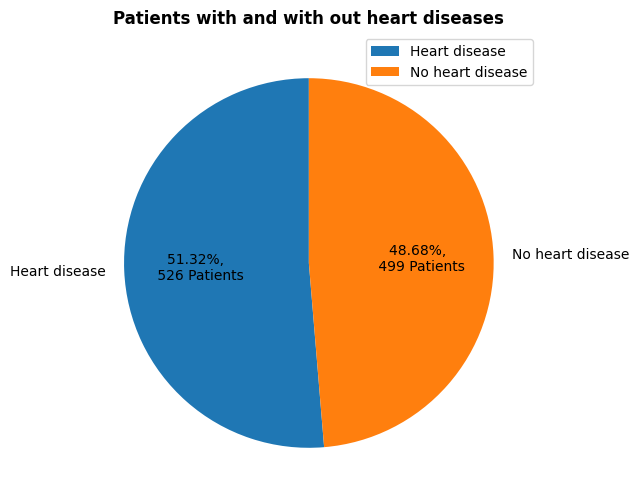

 48.68% patients i.e., 499 do not have heart diseases
 51.32% patients i.e., 526 have heart diseases


In [30]:
plt.figure(figsize = (6,6))
plt.pie(x = df.heart_disease.value_counts(), startangle=90, 
       autopct = lambda p:f'{p:.2f}%, \n {p*sum(df.heart_disease.value_counts().values)/100 :.0f} Patients', frame = False,
       labels = ['Heart disease', 'No heart disease'])
plt.title('Patients with and with out heart diseases', fontweight = 'bold')
plt.legend(loc = 'upper right')
plt.show()
print(heartDisease(df))

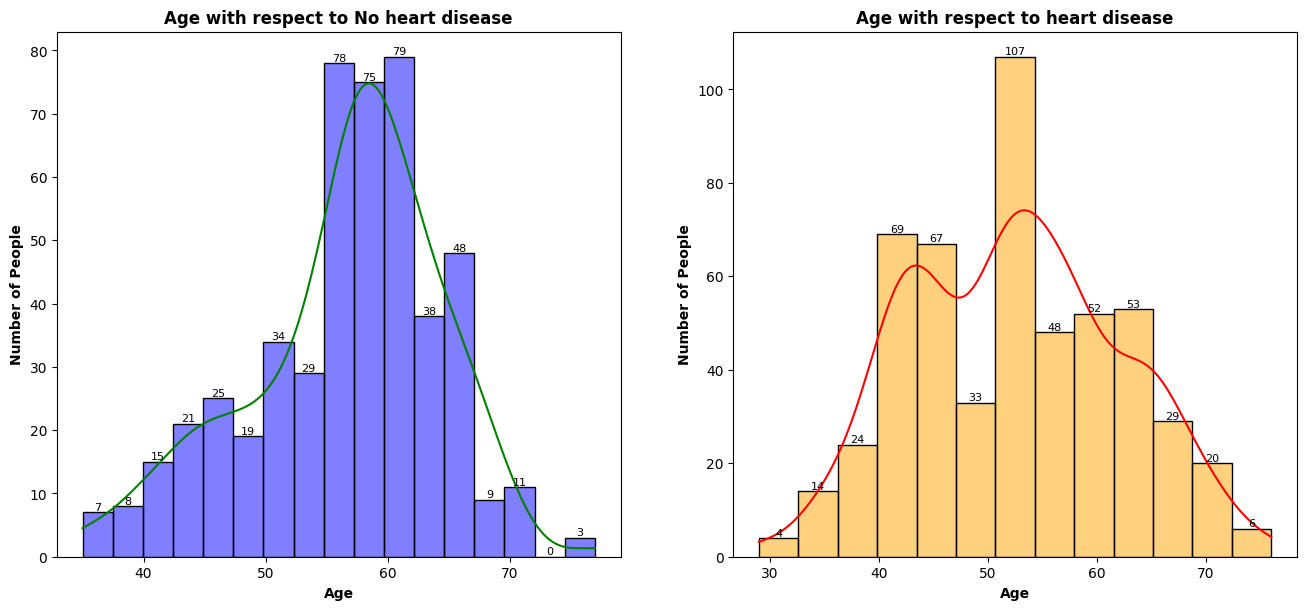

In [31]:
plt.figure(figsize = (16,15))

plt.subplot(221)
ax = sns.histplot(x = df.age[df.heart_disease == 0], kde = True, edgecolor = 'black', color = 'blue')
ax.lines[0].set_color('green')
plt.xlabel('Age', fontweight = 'bold')
plt.ylabel('Number of People', fontweight = 'bold')
plt.title('Age with respect to No heart disease', fontweight = 'bold')
ax.bar_label(ax.containers[0], fontsize = 8)

plt.subplot(222)
ax = sns.histplot(x = df.age[df.heart_disease == 1], kde = True, edgecolor = 'black', color = 'orange')
ax.lines[0].set_color('red')
plt.xlabel('Age', fontweight = 'bold')
plt.ylabel('Number of People', fontweight = 'bold')
plt.title('Age with respect to heart disease', fontweight = 'bold')
ax.bar_label(ax.containers[0], fontsize = 8)

plt.show(close = True)

* The data shows a significant increase in heart disease risk as people age.
* This rise becomes especially sharp after 40 years old.
* There appears to be a higher prevalence of heart disease compared to healthy individuals, particularly between 50-55 years old.
* The likelihood of heart disease continues to rise beyond 60 years old.
* Very few people over 70 seem to be free of heart disease.

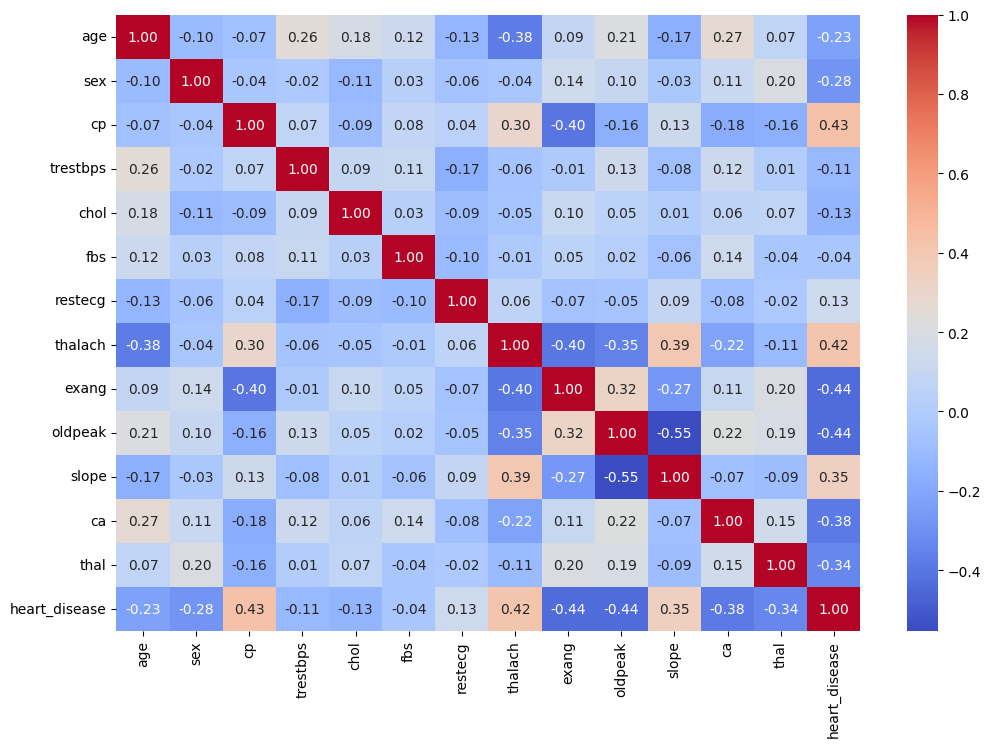

In [32]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(method = 'pearson'), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

### Feature selection

In [33]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# col_list = []

# for i in df.columns:
#     if i != 'heart_disease':
#         col_list.append(i)

In [34]:
# x = df[col_list]

# vif_data = pd.DataFrame()
# vif_data['features'] = x.columns
# vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [35]:
# vif_data

#### columns with more than 5 VIF score will be deleted

In [36]:
# pop_columns = vif_data.features[vif_data.VIF > 5].to_list()

In [37]:
# pop_columns

In [38]:
# df2 = df

In [39]:
# df2.drop(columns= pop_columns, inplace = True)

### **Model Building**

In [40]:
df2 = df.copy()

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [42]:
X = df2.drop(columns = ['heart_disease'], axis = 1)
y = df2.heart_disease

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [44]:
# sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

### Logistic Regression

In [45]:
log_r = LogisticRegression()
log_r.fit(X_train, y_train)

LogisticRegression()

In [46]:
log_predict = log_r.predict(X_test)

In [47]:
acc_score = accuracy_score(y_test, log_predict)
print(f"Logistic Regression Accuracy Score is: {acc_score * 100: .2f}")

Logistic Regression Accuracy Score is:  82.47


<Axes: >

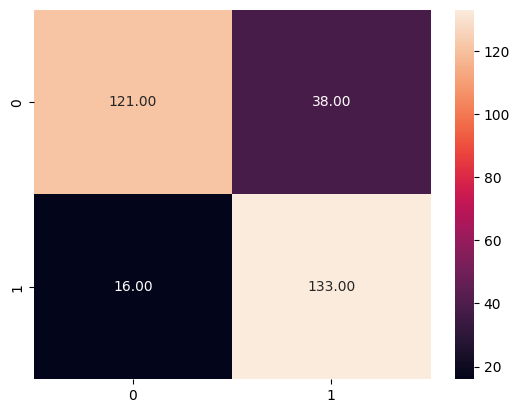

In [48]:
cm = confusion_matrix(y_test, log_predict)

sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels=1, yticklabels=1)

In [49]:
mse = mean_squared_error(y_test, log_predict)
rmse = np.sqrt(mse)

print(f"Logistic Regression Mean Squared error: {mse: .2f}")
print(f"Logistic Regression RMSE: {rmse: .2f}")

Logistic Regression Mean Squared error:  0.18
Logistic Regression RMSE:  0.42


In [50]:
print(classification_report(y_test, log_predict))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       159
           1       0.78      0.89      0.83       149

    accuracy                           0.82       308
   macro avg       0.83      0.83      0.82       308
weighted avg       0.83      0.82      0.82       308



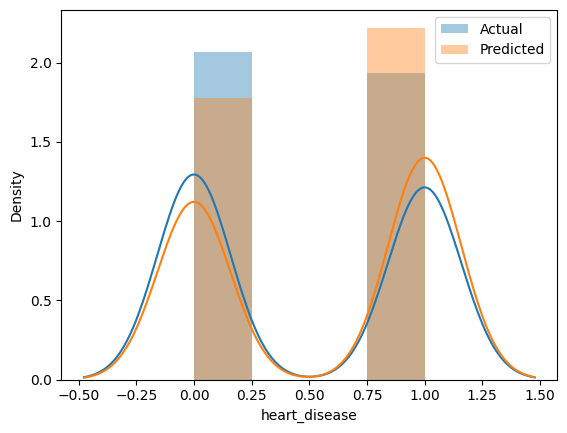

In [51]:
sns.distplot(y_test, label = 'Actual')
sns.distplot(log_predict, label = 'Predicted')
plt.legend()
plt.show()

### Decision Tree Classifier

In [52]:
# class DecisionTreeClf:
#     def __init__(self):
#         self.dtc_model = DecisionTreeClassifier()

#     def model_fit(self):
#         self.model = self.dtc_model.fit(X_train, y_train)

#     def predict(self, X):
#         return self.dtc_model.predict(X)

#     def metrics(self):
#         self.pred = self.predict(X_test)
#         self.dtc_acc = accuracy_score(y_test, self.pred)
#         self.mse = mean_squared_error(y_test, self.pred)
#         self.rmse = np.sqrt(self.mse)
#         self.cls_rprt = classification_report(y_test, self.pred)
#         print(f"Decision Tree accuracy Score: {self.dtc_acc: .2f}")
#         print(f"Decision Tree MSE: {self.mse: .2f}")
#         print(f"Decsion Tree RMSE: {self.rmse: .2f}")
#         print(self.cls_rprt)
#         self.cm = confusion_matrix(y_test, self.pred)
#         sns.heatmap(self.cm, annot = True, fmt = '.2f')
#         plt.show()
        
#     def model_analyze(self):
#         sns.distplot(y_test, label = 'Actual')
#         sns.distplot(self.pred, label = 'Predicted')
#         plt.legend()
#         plt.show()

In [53]:
# if __name__ == "__main__":
#     dtc = DecisionTreeClf()
#     dtc.model_fit()
#     # dtc.predict()
#     dtc.metrics()

In [54]:
# class DTC_Hyp_Tuned:
#     def __init__(self):
#         self.dht_model = DecisionTreeClassifier()

#     def gs_tune(self):
#         self.parameters = {
#             'max_features' : ['log2', 'sqrt', 'auto'],
#             'criterion' : ['entropy', 'gini'],
#             'max_depth' : [2,3,5,10,50],
#             'min_samples_split' : [2,3,50,100],
#             'min_samples_leaf' : [1,5,8,10]
#         }

#         self.grid_obj = GridSearchCV(self.dht_model, self.parameters)
#         self.grid_obj = self.grid_obj.fit(X_train, y_train)
#         self.dht = self.grid_obj.best_estimator_
#         self.dht.fit(X_train, y_train)

#     def predict(self, X):
#         return self.dht.predict(X)

#     def metrics(self):
#         self.pred = self.predict(X_test)
#         self.dtc_acc = accuracy_score(y_test, self.pred)
#         self.mse = mean_squared_error(y_test, self.pred)
#         self.rmse = np.sqrt(self.mse)
#         self.cls_rprt = classification_report(y_test, self.pred)
#         print(f"Decision Tree accuracy Score: {self.dtc_acc: .2f}")
#         print(f"Decision Tree MSE: {self.mse: .2f}")
#         print(f"Decsion Tree RMSE: {self.rmse: .2f}")
#         print(self.cls_rprt)
#         self.cm = confusion_matrix(y_test, self.pred)
#         sns.heatmap(self.cm, annot = True, fmt = '.2f')
#         plt.show()  

#     def model_analyze(self):
#         sns.distplot(y_test, label = 'Actual')
#         sns.distplot(self.pred, label = 'Predicted')
#         plt.legend()
#         plt.show()

In [55]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
dtc_p = dtc.predict(X_test)

In [57]:
def metrics(model,test, predict):
    accu_score = accuracy_score(test, predict)
    mean_sq_er = mean_squared_error(test, predict)
    rt_ms_er = np.sqrt(mean_sq_er)

    print(f"{model} Accuracy Score: {accu_score: .2f}")
    print(f"{model} Mean Squared error: {mean_sq_er: .2f}")
    print(f"{model} Root Mean Squared error: {rt_ms_er: .2f}")
    print(classification_report(test, predict))

    cm = confusion_matrix(test, predict)
    sns.heatmap(cm, annot=True, fmt='.0f')
    plt.show()

    sns.distplot(test, label="Actual")
    sns.distplot(predict, label = "Predicted")
    plt.legend()
    plt.show()

dtc Accuracy Score:  0.97
dtc Mean Squared error:  0.03
dtc Root Mean Squared error:  0.17
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



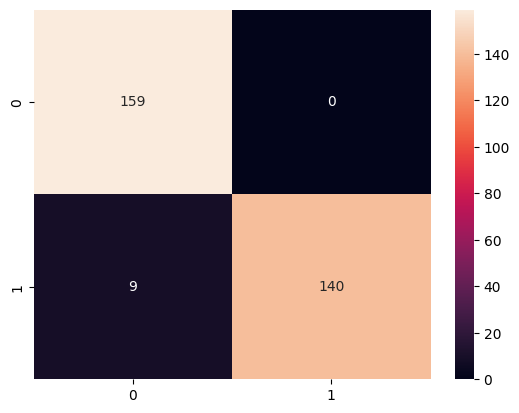

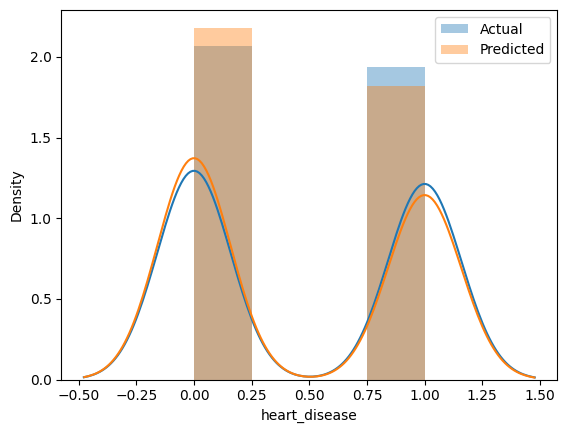

In [58]:
metrics("dtc", y_test, dtc_p)

In [60]:
param = {
            'criterion':['entropy','gini'],
            'max_features':['log2','sqrt','auto'],
            'min_samples_split':[2,3,50,100],
            'min_samples_leaf':[1,3,5,8]
}

dtc_grid = GridSearchCV(dtc, param)
dtc_grid = dtc_grid.fit(X_train, y_train)
dtc_gs = dtc_grid.best_estimator_
dtc_gs.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='log2')

In [61]:
dtc_gs_p = dtc_gs.predict(X_test)

dtc_gs Accuracy Score:  0.98
dtc_gs Mean Squared error:  0.02
dtc_gs Root Mean Squared error:  0.14
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



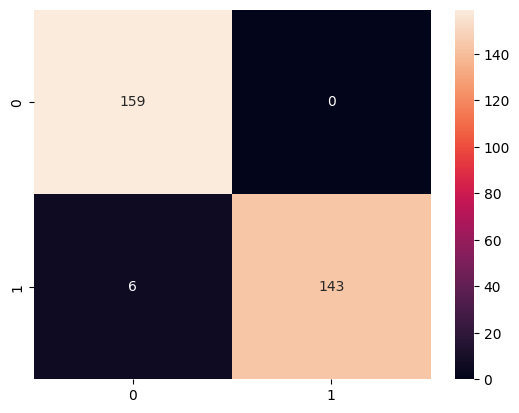

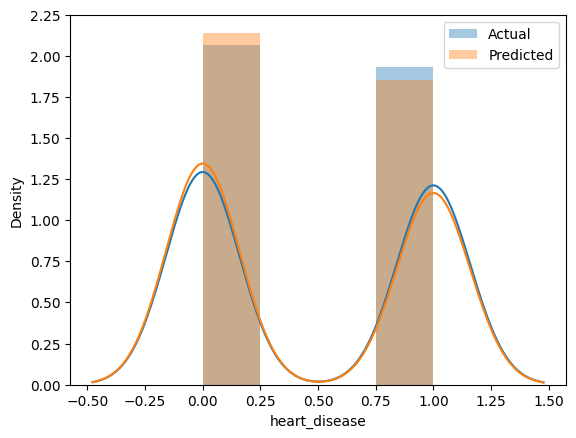

In [62]:
metrics('dtc_gs', y_test, dtc_gs_p)

**Random Forest Classifier**

In [63]:
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [64]:
rfc_p = rfc.predict(X_test)

In [59]:
# class RandomForestClf:
#     def __init__(self):
#         self.rfc = RandomForestClassifier()

#     def model_fit(self):
#         self.model = self.rfc.fit(X_train, y_train)

#     def predict(self, X):
#         return self.rfc.predict(X)

#     def metrics(self):
#         self.pred = self.predict(X_test)
#         self.acc = accuracy_score(y_test, self.pred)
#         self.mse = mean_squared_error(y_test, self.pred)
#         self.rmse = np.sqrt(self.mse)
#         self.cm = confusion_matrix(y_test, self.pred)
#         self.clf_report = classification_report(y_test, self.pred)
#         print(f"RFC Accuracy Score: {self.acc: .2f}")
#         print(f"RFC MSE: {self.mse: .2f}")
#         print(f"RFC RMSE: {self.rmse: .2f}")
#         print(self.clf_report)
#         sns.heatmap(self.cm, annot = True, fmt = '.2f')
#         plt.show()

#     def model_analyze(self):
#         sns.distplot(y_test, label = 'Actual')
#         sns.distplot(self.pred, label = 'Predicted')
#         plt.legend()
#         plt.show()

RFC Accuracy Score:  0.99
RFC Mean Squared error:  0.01
RFC Root Mean Squared error:  0.11
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.97      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



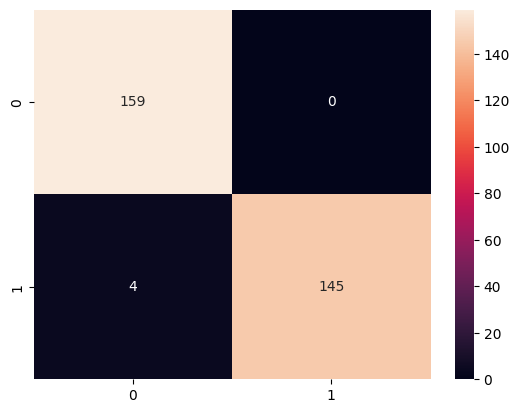

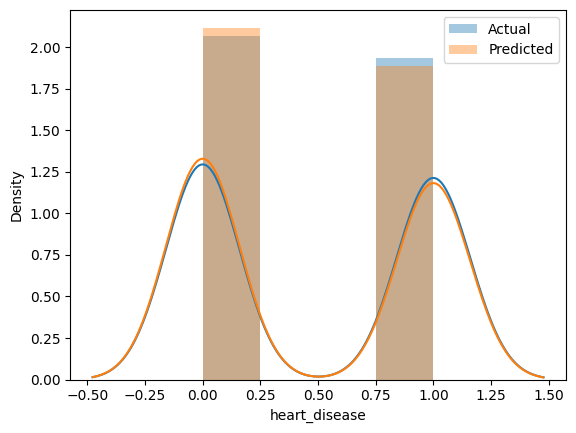

In [65]:
metrics("RFC", y_test, rfc_p)

In [66]:
rfc_param  = {
                'n_estimators':[10,30,50,100,150],
                'criterion':['entropy','gini'],
                'max_features':['log2','sqrt','auto'],
                'min_samples_split':[2,3,50,100],
                'min_samples_leaf':[1,3,5,8,10]
}

rfc_grid = GridSearchCV(rfc, rfc_param, cv=5)
rfc_grid = rfc_grid.fit(X_train, y_train)
rfc_gs = rfc_grid.best_estimator_
rfc_gs.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=30)

In [67]:
rfc_gs_p = rfc_gs.predict(X_test)

RFC Accuracy Score:  0.99
RFC Mean Squared error:  0.01
RFC Root Mean Squared error:  0.10
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.98      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



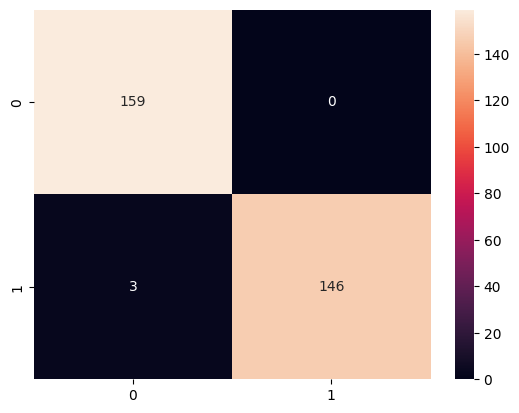

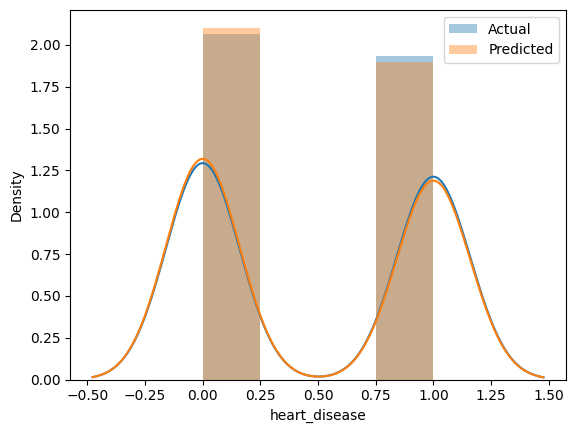

In [68]:
metrics('RFC', y_test, rfc_gs_p)

In [69]:
import pickle

file = 'rg_trained_model.pkl'

pickle.dump(rfc_gs, open(file, 'wb'))

In [70]:
df2.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heart_disease'],
      dtype='object')

In [71]:
df.cp.unique()

array([0, 1, 2, 3], dtype=int64)

In [72]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0


In [91]:
df2.thal.value_counts()

thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64

In [92]:
df2.iloc[-1]

age               54.0
sex                1.0
cp                 0.0
trestbps         120.0
chol             188.0
fbs                0.0
restecg            1.0
thalach          113.0
exang              0.0
oldpeak            1.4
slope              1.0
ca                 1.0
thal               3.0
heart_disease      0.0
Name: 1024, dtype: float64